# Life Expectancy prediction

## Data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
data = pd.read_csv("Life Expectancy Data.csv", nrows = 1000000)

In [4]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

## Preprocessing


In [5]:
col = data.columns
col

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
data.shape

(2938, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [10]:
def miss_columns(df):
    # no of missing values
    missing = []
    for i in col:
        # print(i,len(df[df[i].isna()]))
        if len(df[df[i].isna()]) > 0:
            missing.append(i)
    return missing

missing = miss_columns(data)
missing

['Life expectancy ',
 'Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [11]:
def replace_by_mean(df):
    for i in missing:
        mn = round(df[i].mean(),2)
        print(i, mn)
        df[i] = df[i].replace(np.nan,mn)

replace_by_mean(data)

Life expectancy  69.22
Adult Mortality 164.8
Alcohol 4.6
Hepatitis B 80.94
 BMI  38.32
Polio 82.55
Total expenditure 5.94
Diphtheria  82.32
GDP 7483.16
Population 12753375.12
 thinness  1-19 years 4.84
 thinness 5-9 years 4.87
Income composition of resources 0.63
Schooling 11.99


In [12]:
data.isnull().sum(), data.shape

(Country                            0
 Year                               0
 Status                             0
 Life expectancy                    0
 Adult Mortality                    0
 infant deaths                      0
 Alcohol                            0
 percentage expenditure             0
 Hepatitis B                        0
 Measles                            0
  BMI                               0
 under-five deaths                  0
 Polio                              0
 Total expenditure                  0
 Diphtheria                         0
  HIV/AIDS                          0
 GDP                                0
 Population                         0
  thinness  1-19 years              0
  thinness 5-9 years                0
 Income composition of resources    0
 Schooling                          0
 dtype: int64,
 (2938, 22))

In [13]:
graph = data.copy()

In [14]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2938.000000      2938.000000    2938.000000   
mean   2007.518720         69.224915       164.796460      30.303948   
std       4.613841          9.507640       124.080302     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.200000        74.000000       0.000000   
50%    2008.000000         72.000000       144.000000       3.000000   
75%    2012.000000         75.600000       227.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.602672              738.251295    80.940374    2419.592240   
std       3.916288             1987.914858    22.586855   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       1.092500                4.685343    80.940000       0.000000   
50%       4.160000               64.912906    87.000000      17.000000   
75%       7.390000              441.534144    96.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2938.000000         2938.000000  2938.000000        2938.000000   
mean     38.321232           42.035739    82.550187           5.938329   
std      19.927677          160.445548    23.352143           2.400274   
min       1.000000            0.000000     3.000000           0.370000   
25%      19.400000            0.000000    78.000000           4.370000   
50%      43.000000            4.000000    93.000000           5.940000   
75%      56.100000           28.000000    97.000000           7.330000   
max      87.300000         2500.000000    99.000000          17.600000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2938.000000  2938.000000    2938.000000  2.938000e+03   
mean     82.324057     1.742103    7483.158703  1.275338e+07   
std      23.640073     5.077785   13136.800417  5.381546e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     580.486996  4.189172e+05   
50%      93.000000     0.100000    3116.561755  3.675929e+06   
75%      97.000000     0.800000    7483.160000  1.275338e+07   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2938.000000          2938.000000   
mean                4.839707             4.870313   
std                 4.394535             4.482708   
min                 0.100000             0.100000   
25%                 1.600000             1.600000   
50%                 3.400000             3.400000   
75%                 7.100000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2938.000000  2938.000000  
mean                          0.627690    11.992638  
std                           0.204821     3.264381  
min                           0.000000     0.000000  
25%                           0.504250    10.300000  
50%                           0.662000    12.100000  
75%                           0.772000    14.100000  
max                           0.948000    20.700000

In [15]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [ ]:
# plot_data.plot(kind='density', subplots=True, layout=(12,2), sharex=False)

## Checking the OLS assumptions

<ipython-input-16-7261ee1ca47b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Oranges_r')


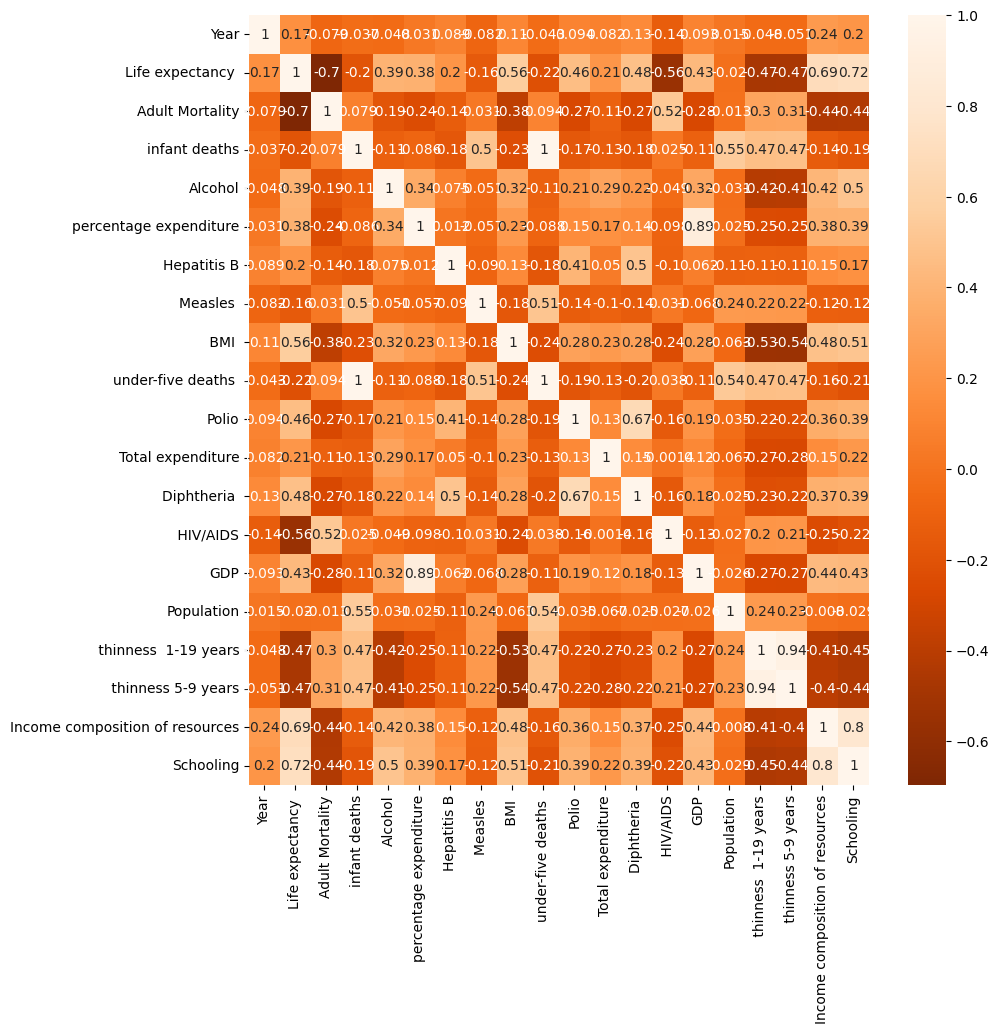

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='Oranges_r')
plt.show()

In [17]:
data = data.drop(['under-five deaths ', 'percentage expenditure', ' thinness 5-9 years', 'Schooling'],axis=1)

In [18]:
col = data.columns
num_cols = [col[idx] for idx,i in enumerate(data.dtypes) if i==data.dtypes[1] or i==data.dtypes[-1]]
num_cols

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 'Income composition of resources']

Outliers removal

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>,
        <Axes: title={'center': ' BMI '}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>]],
      dtype=object)

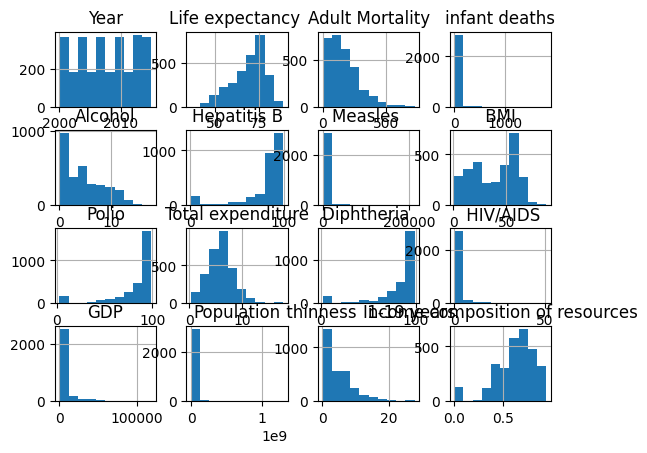

In [19]:
plot_data = data[num_cols]
plot_data.hist()

In [20]:
remove_out = ['Adult Mortality',
 'Alcohol',
 'Hepatitis B',
 ' BMI ',
 'Total expenditure',
 'Income composition of resources']

for rem_col in remove_out:
  u = data[rem_col].quantile(0.99)
  l = data[rem_col].quantile(0.01)
  data = data[data[rem_col]>l]
  data = data[data[rem_col]<u]
  print(data.shape, rem_col)

(2878, 18) Adult Mortality
(2564, 18) Alcohol
(2333, 18) Hepatitis B
(2285, 18)  BMI 
(2238, 18) Total expenditure
(2104, 18) Income composition of resources


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>,
        <Axes: title={'center': ' BMI '}>],
       [<Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>,
        <Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>],
       [<Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>]],
      dtype=object)

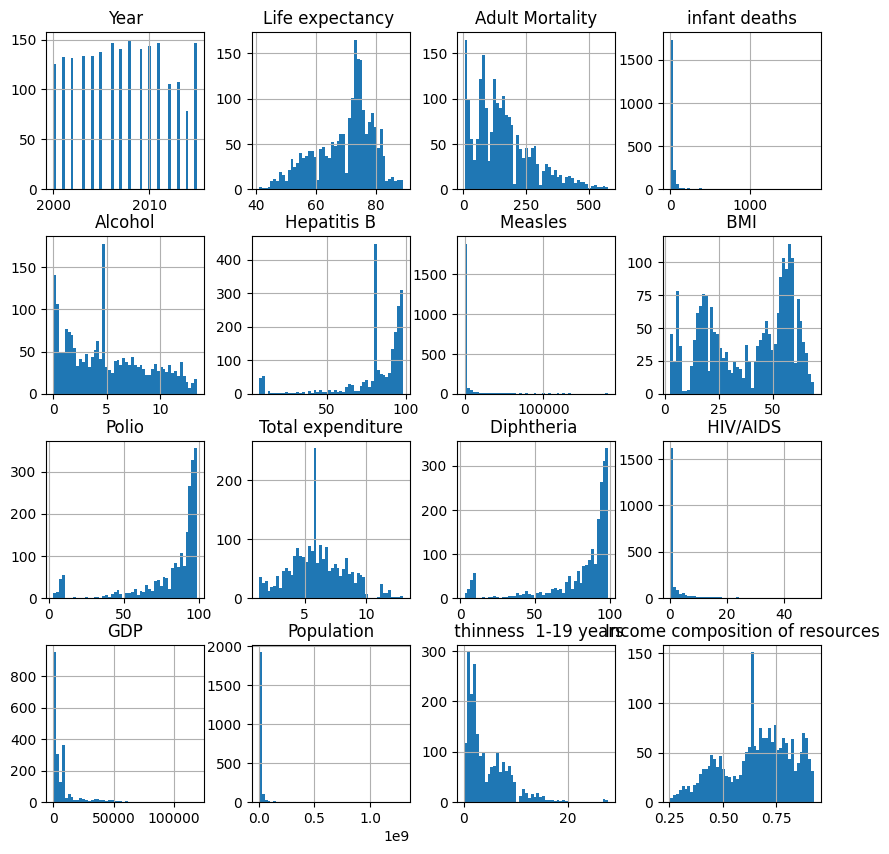

In [21]:
data.hist(bins=50, figsize=(10, 10))

Linearity, Homoscacidity

In [22]:
num_cols

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 'Income composition of resources']

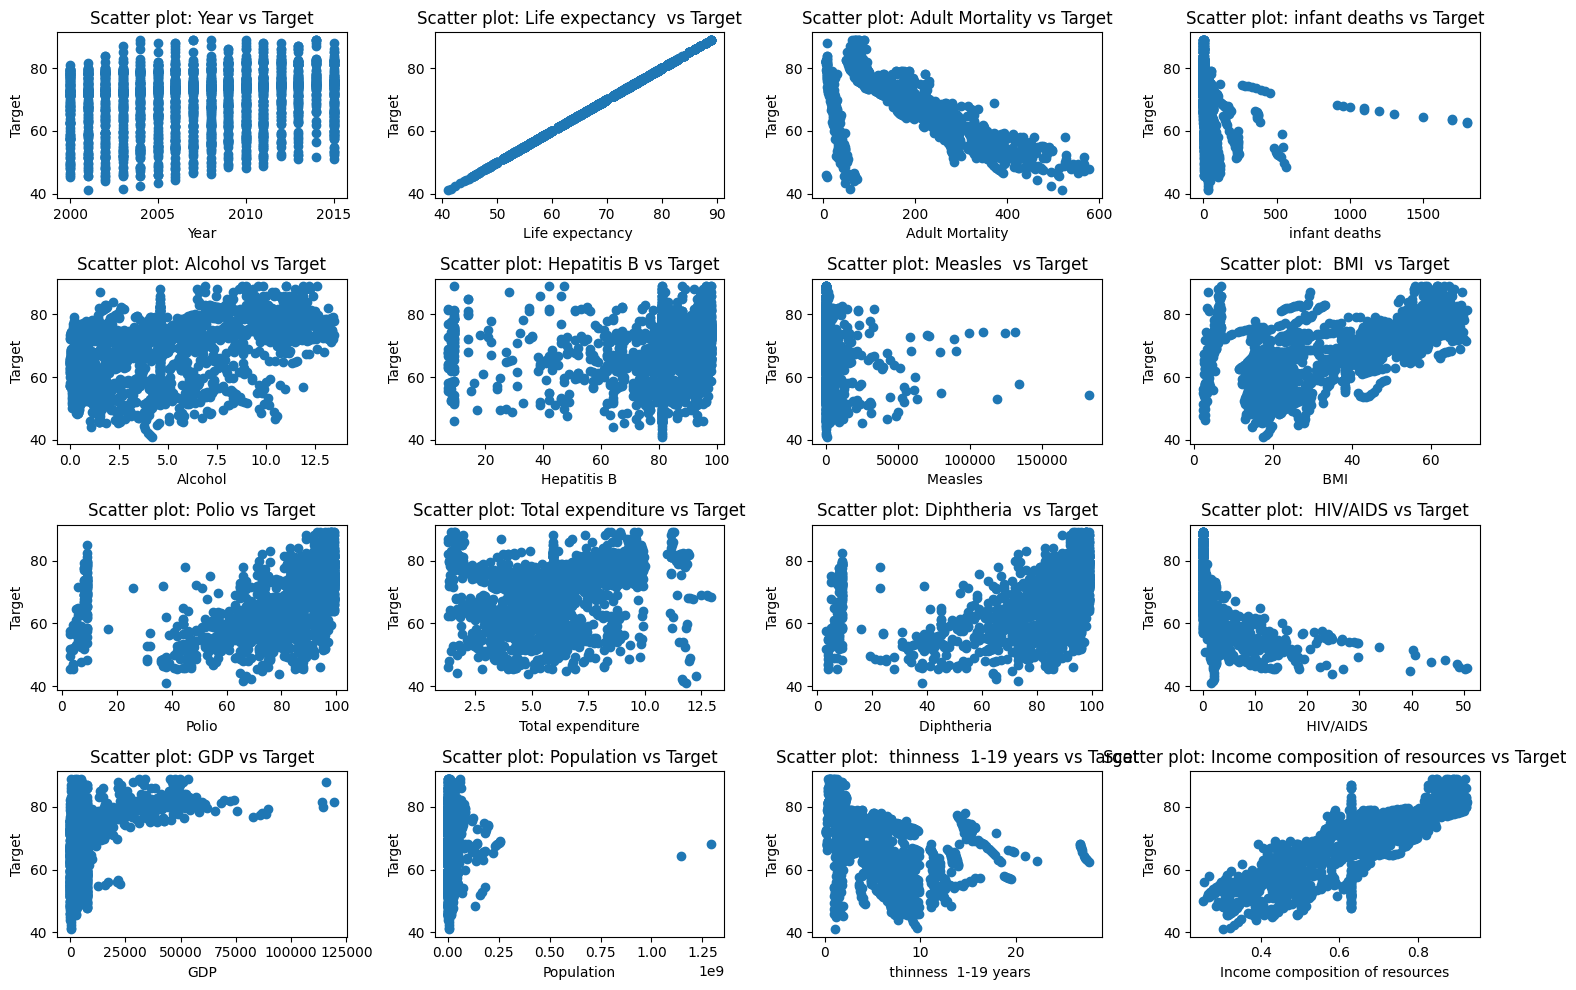

In [23]:
# Determine the number of rows and columns for the grid
r = 4
c = 4
fig, axes = plt.subplots(r, c, figsize=(15, 10))

# Iterate over the columns and plot scatter plots
for i, column in enumerate(num_cols):
    row = i // c  # Calculate the row index
    col = i % c  # Calculate the column index
    axes[row, col].scatter(data[column], data['Life expectancy '])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Target')
    axes[row, col].set_title(f'Scatter plot: {column} vs Target')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


In [24]:
log_cols = ['infant deaths',
 'Hepatitis B',
 'Measles ',
 'Total expenditure',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years']

In [25]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2104.000000       2104.000000      2104.000000    2104.000000   
mean   2007.304183         69.708565       160.640589      30.003327   
std       4.478794          9.572211       117.489997     117.015922   
min    2000.000000         41.000000         5.000000       0.000000   
25%    2004.000000         63.275000        73.000000       0.000000   
50%    2007.000000         72.500000       138.500000       3.000000   
75%    2011.000000         76.200000       225.000000      22.000000   
max    2015.000000         89.000000       578.000000    1800.000000   

           Alcohol  Hepatitis B       Measles          BMI         Polio  \
count  2104.000000  2104.000000    2104.000000  2104.000000  2104.000000   
mean      5.089710    80.764335    2392.661597    38.703441    82.334173   
std       3.706128    21.372560   10579.761065    19.460391    23.109157   
min       0.020000     7.000000       0.000000     2.400000     3.000000   
25%       1.750000    80.940000       0.000000    19.675000    78.000000   
50%       4.600000    86.000000      20.000000    44.400000    92.000000   
75%       7.832500    95.000000     408.000000    56.300000    97.000000   
max      13.450000    98.000000  182485.000000    69.200000    99.000000   

       Total expenditure  Diphtheria      HIV/AIDS            GDP  \
count        2104.000000  2104.000000  2104.000000    2104.000000   
mean            6.037795    81.955627     1.729895    7798.775145   
std             2.211562    23.589935     4.754686   13309.790045   
min             1.290000     3.000000     0.100000       1.681350   
25%             4.550000    78.000000     0.100000     615.362402   
50%             5.940000    92.000000     0.100000    3221.986705   
75%             7.460000    96.000000     0.800000    7483.160000   
max            12.940000    99.000000    50.600000  119172.741800   

         Population   thinness  1-19 years  Income composition of resources  
count  2.104000e+03            2104.000000                      2104.000000  
mean   1.255115e+07               4.616150                         0.659633  
std    4.503787e+07               4.221939                         0.160285  
min    3.400000e+01               0.100000                         0.253000  
25%    4.456208e+05               1.500000                         0.546000  
50%    3.760526e+06               2.900000                         0.677000  
75%    1.275338e+07               6.900000                         0.784000  
max    1.293859e+09              27.700000                         0.925000

In [26]:
data[log_cols] = np.log(data[log_cols]+ 1e-2)

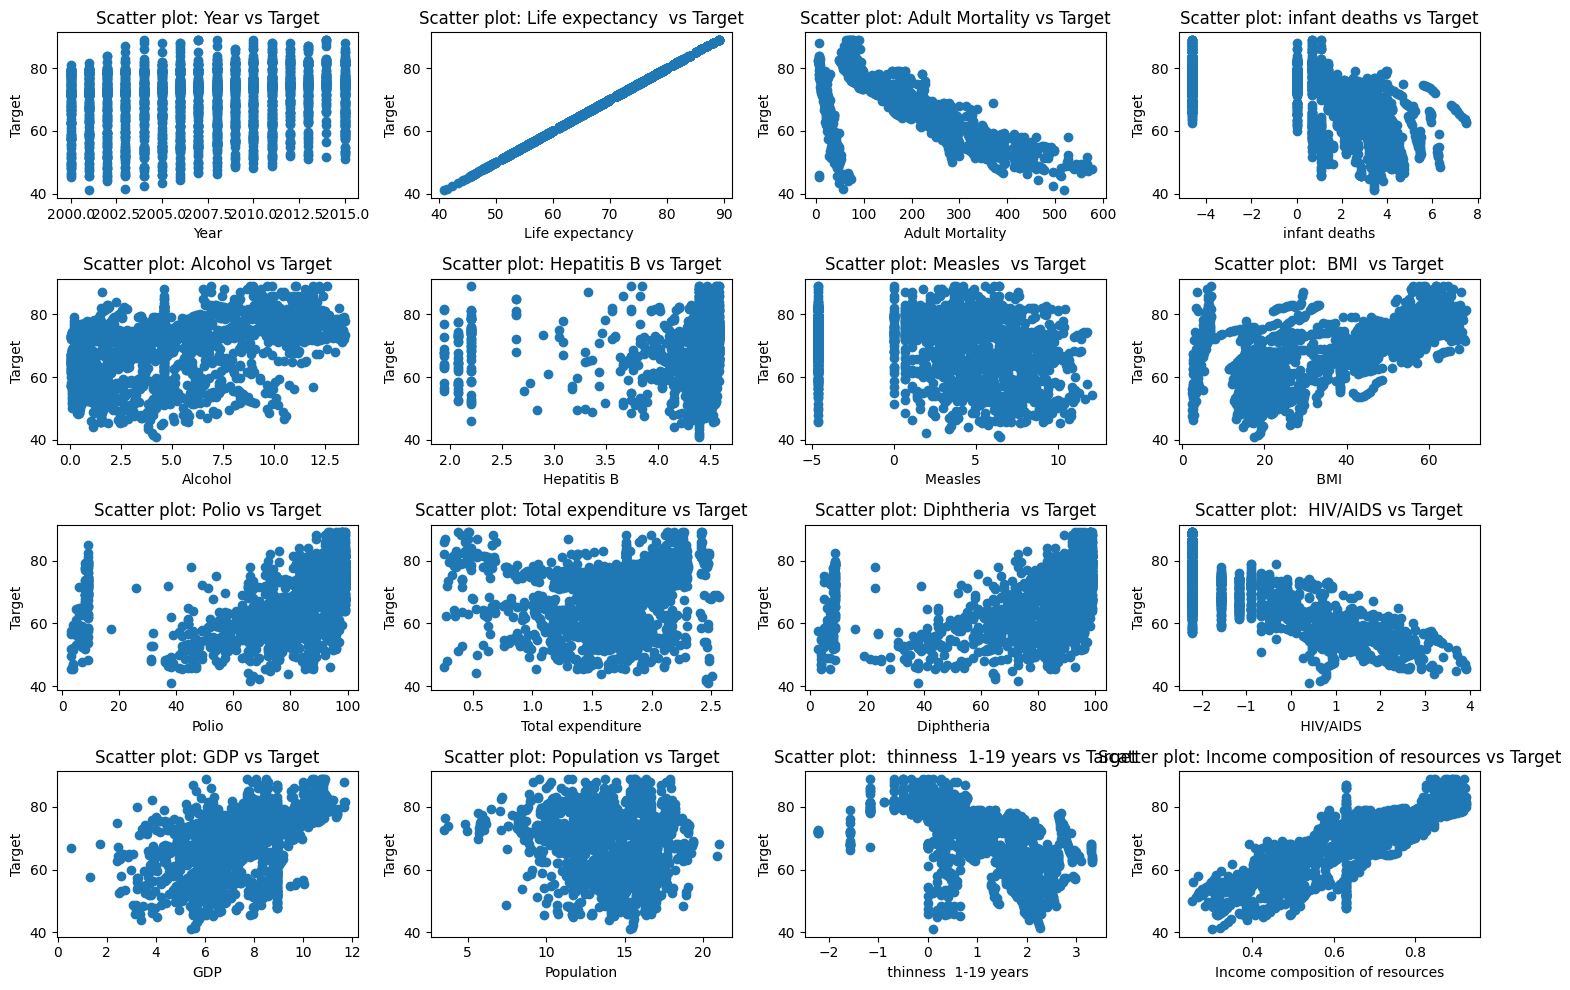

In [27]:
# Determine the number of rows and columns for the grid
r = 4
c = 4
fig, axes = plt.subplots(r, c, figsize=(15, 10))

# Iterate over the columns and plot scatter plots
for i, column in enumerate(num_cols):
    row = i // c  # Calculate the row index
    col = i % c  # Calculate the column index
    axes[row, col].scatter(data[column], data['Life expectancy '])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Target')
    axes[row, col].set_title(f'Scatter plot: {column} vs Target')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()


In [28]:
data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2104.000000       2104.000000      2104.000000    2104.000000   
mean   2007.304183         69.708565       160.640589       0.448209   
std       4.478794          9.572211       117.489997       3.325415   
min    2000.000000         41.000000         5.000000      -4.605170   
25%    2004.000000         63.275000        73.000000      -4.605170   
50%    2007.000000         72.500000       138.500000       1.101940   
75%    2011.000000         76.200000       225.000000       3.091497   
max    2015.000000         89.000000       578.000000       7.495547   

           Alcohol  Hepatitis B     Measles          BMI         Polio  \
count  2104.000000  2104.000000  2104.000000  2104.000000  2104.000000   
mean      5.089710     4.305004     1.874794    38.703441    82.334173   
std       3.706128     0.538656     5.083269    19.460391    23.109157   
min       0.020000     1.947338    -4.605170     2.400000     3.000000   
25%       1.750000     4.393832    -4.605170    19.675000    78.000000   
50%       4.600000     4.454464     2.996232    44.400000    92.000000   
75%       7.832500     4.553982     6.011292    56.300000    97.000000   
max      13.450000     4.585070    12.114423    69.200000    99.000000   

       Total expenditure  Diphtheria      HIV/AIDS          GDP   Population  \
count        2104.000000  2104.000000  2104.000000  2104.000000  2104.000000   
mean            1.719678    81.955627    -1.119250     7.733663    14.492423   
std             0.428823    23.589935     1.587277     1.810964     2.528544   
min             0.262364     3.000000    -2.207275     0.525527     3.526655   
25%             1.517323    78.000000    -2.207275     6.422227    13.007221   
50%             1.783391    92.000000    -2.207275     8.077756    15.140069   
75%             2.010895    96.000000    -0.210721     8.920412    16.361307   
max             2.561096    99.000000     3.924149    11.688329    20.980895   

        thinness  1-19 years  Income composition of resources  
count            2104.000000                      2104.000000  
mean                1.110320                         0.659633  
std                 0.979561                         0.160285  
min                -2.207275                         0.253000  
25%                 0.412110                         0.546000  
50%                 1.068153                         0.677000  
75%                 1.932970                         0.784000  
max                 3.321793                         0.925000

In [29]:
cleaned_data = data.copy()
cleaned_data.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years',
       'Income composition of resources'], dtype=object)

In [30]:
cleaned_col = ['Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ',
       'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years',
       'Income composition of resources']

In [31]:
cleaned_data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2104.000000       2104.000000      2104.000000    2104.000000   
mean   2007.304183         69.708565       160.640589       0.448209   
std       4.478794          9.572211       117.489997       3.325415   
min    2000.000000         41.000000         5.000000      -4.605170   
25%    2004.000000         63.275000        73.000000      -4.605170   
50%    2007.000000         72.500000       138.500000       1.101940   
75%    2011.000000         76.200000       225.000000       3.091497   
max    2015.000000         89.000000       578.000000       7.495547   

           Alcohol  Hepatitis B     Measles          BMI         Polio  \
count  2104.000000  2104.000000  2104.000000  2104.000000  2104.000000   
mean      5.089710     4.305004     1.874794    38.703441    82.334173   
std       3.706128     0.538656     5.083269    19.460391    23.109157   
min       0.020000     1.947338    -4.605170     2.400000     3.000000   
25%       1.750000     4.393832    -4.605170    19.675000    78.000000   
50%       4.600000     4.454464     2.996232    44.400000    92.000000   
75%       7.832500     4.553982     6.011292    56.300000    97.000000   
max      13.450000     4.585070    12.114423    69.200000    99.000000   

       Total expenditure  Diphtheria      HIV/AIDS          GDP   Population  \
count        2104.000000  2104.000000  2104.000000  2104.000000  2104.000000   
mean            1.719678    81.955627    -1.119250     7.733663    14.492423   
std             0.428823    23.589935     1.587277     1.810964     2.528544   
min             0.262364     3.000000    -2.207275     0.525527     3.526655   
25%             1.517323    78.000000    -2.207275     6.422227    13.007221   
50%             1.783391    92.000000    -2.207275     8.077756    15.140069   
75%             2.010895    96.000000    -0.210721     8.920412    16.361307   
max             2.561096    99.000000     3.924149    11.688329    20.980895   

        thinness  1-19 years  Income composition of resources  
count            2104.000000                      2104.000000  
mean                1.110320                         0.659633  
std                 0.979561                         0.160285  
min                -2.207275                         0.253000  
25%                 0.412110                         0.546000  
50%                 1.068153                         0.677000  
75%                 1.932970                         0.784000  
max                 3.321793                         0.925000

Multicollinearity

In [32]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus we will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = cleaned_data[cleaned_col]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [33]:
vif

VIF                         Features
0   425.766885                             Year
1   437.032818                 Life expectancy 
2     5.759231                  Adult Mortality
3     2.296289                    infant deaths
4     5.056542                          Alcohol
5    79.310059                      Hepatitis B
6     1.572759                         Measles 
7     8.761770                             BMI 
8    25.516595                            Polio
9    20.180135                Total expenditure
10   27.553975                      Diphtheria 
11    5.159862                         HIV/AIDS
12   34.755306                              GDP
13   41.550455                       Population
14    4.394502             thinness  1-19 years
15  110.768079  Income composition of resources

<ipython-input-34-7261ee1ca47b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap='Oranges_r')


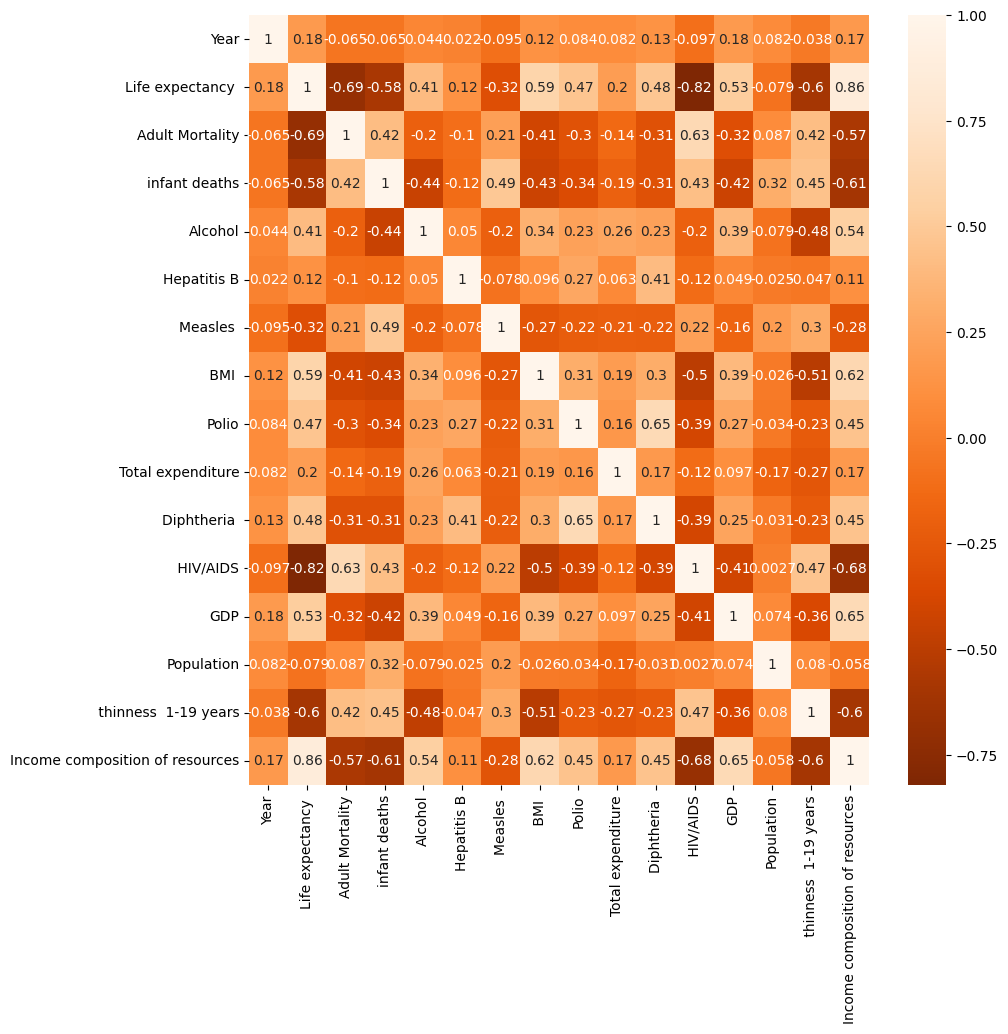

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='Oranges_r')
plt.show()

No Endoginity

In [35]:
Final_data = data.drop(['Country','Year', 'Population', 'Hepatitis B', 'Diphtheria ', 'Total expenditure', 'GDP'], axis=1)

In [36]:
Final_data.head()

Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
7   Developing              58.1            287.0       4.382152     0.03   
8   Developing              57.5            295.0       4.406841     0.02   
9   Developing              57.3            295.0       4.430936     0.03   
10  Developing              57.3            291.0       4.442769     0.02   
11  Developing              57.0            293.0       4.466023     0.02   

    Measles    BMI   Polio   HIV/AIDS   thinness  1-19 years  \
7   7.377140   15.7   64.0  -2.207275               2.934389   
8   7.039669   15.2   63.0  -2.207275               2.944965   
9   7.595895   14.7   58.0  -2.207275               2.955431   
10  7.167046   14.2   58.0  -2.207275               2.960623   
11  6.144207   13.8    5.0  -2.207275               2.970927   

    Income composition of resources  
7                             0.433  
8                             0.415  
9                             0.405  
10                            0.396  
11                            0.381

In [37]:
# variables = data[cleaned_col]
# vif = pd.DataFrame()

# # here we make use of the variance_inflation_factor, which will basically output the respective VIFs
# vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# # Finally, I like to include names so it is easier to explore the result
# vif["Features"] = variables.columns

## Models

Encoding

In [38]:
# Coverting the labels into a numeric form using Label Encoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in Final_data.columns:
    if Final_data[col].dtype=='object':
        le.fit(Final_data[col])
        Final_data[col]=le.transform(Final_data[col])

Final_data.head()

Status  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
7        1              58.1            287.0       4.382152     0.03   
8        1              57.5            295.0       4.406841     0.02   
9        1              57.3            295.0       4.430936     0.03   
10       1              57.3            291.0       4.442769     0.02   
11       1              57.0            293.0       4.466023     0.02   

    Measles    BMI   Polio   HIV/AIDS   thinness  1-19 years  \
7   7.377140   15.7   64.0  -2.207275               2.934389   
8   7.039669   15.2   63.0  -2.207275               2.944965   
9   7.595895   14.7   58.0  -2.207275               2.955431   
10  7.167046   14.2   58.0  -2.207275               2.960623   
11  6.144207   13.8    5.0  -2.207275               2.970927   

    Income composition of resources  
7                             0.433  
8                             0.415  
9                             0.405  
10                            0.396  
11                            0.381

In [39]:
Final_data.isnull().sum(), Final_data.shape

(Status                             0
 Life expectancy                    0
 Adult Mortality                    0
 infant deaths                      0
 Alcohol                            0
 Measles                            0
  BMI                               0
 Polio                              0
  HIV/AIDS                          0
  thinness  1-19 years              0
 Income composition of resources    0
 dtype: int64,
 (2104, 11))

In [40]:
x_train = Final_data.copy()
y_train = x_train["Life expectancy "]
x_train = x_train.drop(["Life expectancy "], axis=1)
x_train.head()

Status  Adult Mortality  infant deaths  Alcohol  Measles    BMI   Polio  \
7        1            287.0       4.382152     0.03  7.377140   15.7   64.0   
8        1            295.0       4.406841     0.02  7.039669   15.2   63.0   
9        1            295.0       4.430936     0.03  7.595895   14.7   58.0   
10       1            291.0       4.442769     0.02  7.167046   14.2   58.0   
11       1            293.0       4.466023     0.02  6.144207   13.8    5.0   

     HIV/AIDS   thinness  1-19 years  Income composition of resources  
7   -2.207275               2.934389                            0.433  
8   -2.207275               2.944965                            0.415  
9   -2.207275               2.955431                            0.405  
10  -2.207275               2.960623                            0.396  
11  -2.207275               2.970927                            0.381

In [41]:
x_train.shape

(2104, 10)

In [42]:
# Import the preprocessing module
# StandardScaler is one of the easiest and 'cleanest' ways to preprocess your data

from sklearn.preprocessing import StandardScaler

In [43]:
# Create an instance of the StandardScaler class
scaler = StandardScaler()

In [44]:
col = data.columns

In [45]:
dd = data.dtypes
num_col = []
idx = 0
for i in list(dd):
  if "64" in str(i):
    num_col.append(col[idx])
  idx += 1
num_col

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 'Income composition of resources']

In [46]:
# num_col.remove("Life expectancy ")

In [47]:
# num_col.remove("Country")
# num_col.remove("Status")
# num_col.remove("iso")

In [48]:
x_train.isnull().sum()

Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Measles                            0
 BMI                               0
Polio                              0
 HIV/AIDS                          0
 thinness  1-19 years              0
Income composition of resources    0
dtype: int64

In [49]:
col = x_train.columns
col

Index(['Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Measles ',
       ' BMI ', 'Polio', ' HIV/AIDS', ' thinness  1-19 years',
       'Income composition of resources'],
      dtype='object')

In [50]:
# Fit the input data (x)
# Essentially we are calculating the mean and standard deviation feature-wise
# (the mean of 'SAT' and the standard deviation of 'SAT',
# as well as the mean of 'Rand 1,2,3' and the standard deviation of 'Rand 1,2,3')

scaler.fit(x_train)

StandardScaler()

In [51]:
x_scaled = scaler.transform(x_train)

In [52]:
x_scaled

array([[ 0.4927112 ,  1.07574647,  1.18327429, ..., -0.68562966,
         1.86257114, -1.41426751],
       [ 0.4927112 ,  1.14385356,  1.19070056, ..., -0.68562966,
         1.8733709 , -1.52659387],
       [ 0.4927112 ,  1.14385356,  1.19794789, ..., -0.68562966,
         1.88405763, -1.5889974 ],
       ...,
       [ 0.4927112 , -0.7971985 ,  0.87812371, ...,  2.70032682,
         1.01603631, -1.53283422],
       [ 0.4927112 , -1.30800168,  0.86757244, ...,  2.77775962,
         1.06461183, -1.57027634],
       [ 0.4927112 , -0.74611819,  0.83349766, ...,  3.02688897,
        -0.93911204, -1.45170963]])

In [53]:
# len(x_scaled_demo[0])

In [54]:
x_scaled = pd.DataFrame(x_scaled, columns = col)
x_scaled.head()

Status  Adult Mortality  infant deaths   Alcohol  Measles       BMI   \
0  0.492711         1.075746       1.183274 -1.365553  1.082700 -1.182346   
1  0.492711         1.143854       1.190701 -1.368251  1.016295 -1.208045   
2  0.492711         1.143854       1.197948 -1.365553  1.125744 -1.233744   
3  0.492711         1.109800       1.201507 -1.368251  1.041359 -1.259444   
4  0.492711         1.126827       1.208502 -1.368251  0.840095 -1.280003   

      Polio   HIV/AIDS   thinness  1-19 years  Income composition of resources  
0 -0.793561   -0.68563               1.862571                        -1.414268  
1 -0.836844   -0.68563               1.873371                        -1.526594  
2 -1.053260   -0.68563               1.884058                        -1.588997  
3 -1.053260   -0.68563               1.889359                        -1.645161  
4 -3.347269   -0.68563               1.899881                        -1.738766

**Distribution analysis** :
Perform Kolmogorov–Smirnov test to find which of numerical attributes are close to normal (significance 5%).

In [55]:
num_col.remove("Life expectancy ")

In [56]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_scaled, y_train, test_size=0.20, random_state=0)

In [57]:
x_scaled.isnull().sum()

Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Measles                            0
 BMI                               0
Polio                              0
 HIV/AIDS                          0
 thinness  1-19 years              0
Income composition of resources    0
dtype: int64

In [58]:
train_x.shape

(1683, 10)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(train_x,train_y)

LinearRegression()

In [61]:
reg.coef_, reg.intercept_

(array([-0.39773007, -1.31971353, -0.17469156, -0.16799502, -0.41803298,
         0.01542557,  0.53794242, -3.30628793, -0.61717996,  4.28839703]),
 69.72485675143943)

In [62]:
y_hat = reg.predict(train_x)

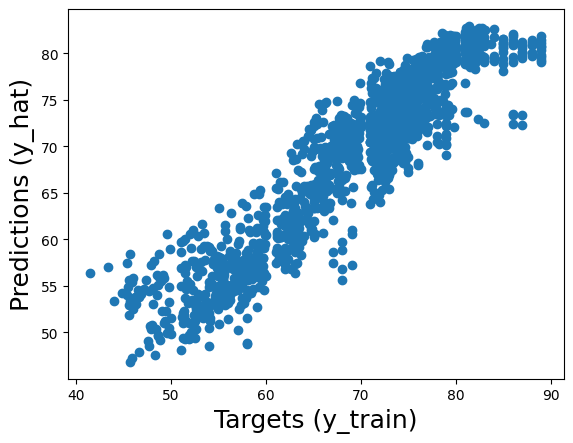

In [63]:
plt.scatter(train_y, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [64]:
rmse = mean_squared_error(train_y, y_hat)**(0.5)
rmse

3.4412065041219124

In [65]:
reg.score(test_x, test_y)

0.8800185048415092

In [66]:
# train_x.isnull().sum(), train_x.shape

In [67]:
def k_cross_fold(x_train, y_train, model, k):
  Rmse = float("inf")
  pre = None
  intercept = None
  prev = None
  coeff = None
  lg = len(x_train)
  split_amount = int(lg/k)
  for i in range(k):
      if i == 0:
        train_x = x_train.iloc[split_amount*(i+1) : ]
        train_y = y_train[split_amount*(i+1) : ]
        test_x = x_train.iloc[ : split_amount*(i+1)]
        test_y = y_train[ : split_amount*(i+1)]

      elif i == k-1:
        train_x = x_train.iloc[ : split_amount*(i)]
        train_y = y_train[ : split_amount*(i)]
        test_x = x_train.iloc[split_amount*(i) : ]
        test_y = y_train[split_amount*(i) : ]

      else :
        test_x = x_train.iloc[int(split_amount* (i)) : int(split_amount* (i+1))]
        test_y =  y_train[int(split_amount* (i)) : int(split_amount* (i+1))]
        train_x = x_train.iloc[ : int(split_amount* (i))]
        train_x = np.append(train_x, x_train.iloc[int(split_amount* (i+1)) : ], axis = 0)
        train_y = y_train[ : int(split_amount* (i))]
        train_y = np.append(train_y, y_train[int(split_amount* (i+1)) : ], axis = 0)
#       print(train_x.shape)
      model.fit(np.array(train_x),train_y)
      y_hat = model.predict(test_x)
      coeff = model.coef_
      intercept = model.intercept_
      print('MAPE on train data: ', mean_squared_error(test_y, y_hat)**(0.5))

      if Rmse > mean_squared_error(test_y, y_hat)**(0.5):
        Rmse = mean_squared_error(test_y, y_hat)**(0.5)
        pre = intercept
        prev = coeff

  return Rmse, pre, prev

In [68]:
model = LinearRegression()
rmse, intercept, coeff = k_cross_fold(train_x, train_y, model, 10)
rmse

MAPE on train data:  3.2656793311547667
MAPE on train data:  3.6369784744279254
MAPE on train data:  3.6527831776347646
MAPE on train data:  3.3433481295332315
MAPE on train data:  3.368376691384905
MAPE on train data:  3.6081289529568834
MAPE on train data:  3.5457567091409454
MAPE on train data:  2.947058303404738
MAPE on train data:  3.932506382654438
MAPE on train data:  3.3004713016807616


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr

2.947058303404738

In [69]:
model.intercept_, model.coef_ = intercept, coeff

In [70]:
model.score(test_x, test_y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


0.8797184860619918

In [71]:
y_hat = model.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


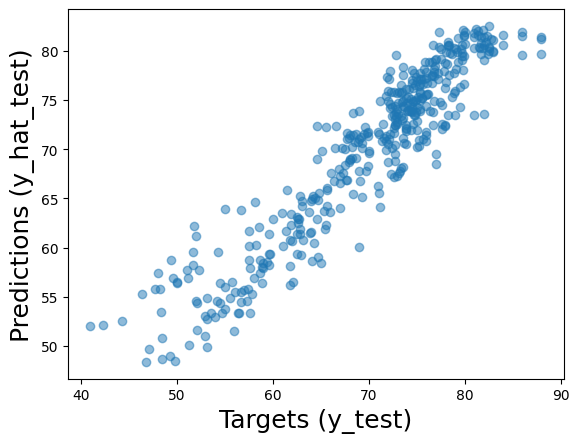

In [72]:
plt.scatter(test_y, y_hat, alpha=0.5)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [73]:
rmse = mean_squared_error(test_y, y_hat)**(0.5)
rmse

3.2686016531368676

Normaized, Endoginity

<ipython-input-74-986fa8670463>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_y - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

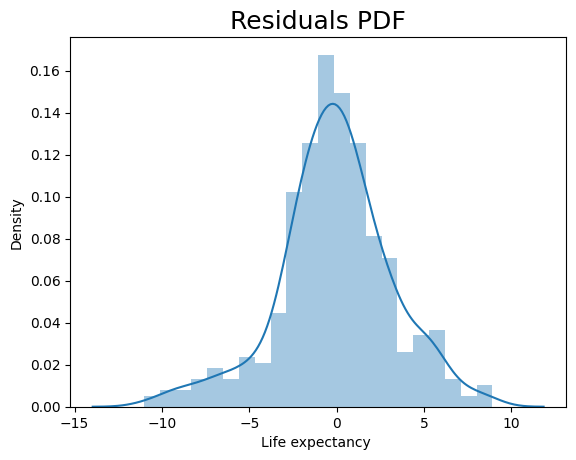

In [74]:
sns.distplot(test_y - y_hat)
plt.title("Residuals PDF", size=18)

In [75]:
# F - statistic = (SS-model/k)/(SS-error/n-k-1)
y = np.array(train_y)
y_pred = reg.predict(train_x)

ss_model = sum((y_pred - y.mean())**2)
ss_error = sum((y - y_pred)**2)
ss_total = sum((y - y.mean())**2)

F_stat = (ss_model/len(x_train.columns))/(ss_error/(len(x_train)-len(pd.DataFrame(x_train).columns)-1))

print("SS Model :",np.round(ss_model,2))
print("SS Error :",np.round(ss_error,2))
print("\nSS Total :",np.round(ss_total,2)," = SS Model + SS Error")
print("\nF-statistic :",np.round(F_stat,2))

SS Model : 135361.79
SS Error : 19929.92

SS Total : 155291.71  = SS Model + SS Error

F-statistic : 1421.54


In [76]:
log_cols, 1e-2

(['infant deaths',
  'Hepatitis B',
  'Measles ',
  'Total expenditure',
  ' HIV/AIDS',
  'GDP',
  'Population',
  ' thinness  1-19 years'],
 0.01)

In [77]:
column = x_train.columns
inp = ["Developing", 263, 62, 0.01, 1154, 19.1, 6, 0.1, 17.2, 0.479]

def prediction(column, inp):
  X = []
  for idx, i in enumerate(inp):
    if column[idx] in log_cols:
      X.append(np.log(i)+1e-2)
    elif column[idx] == "Status":
      X.append(le.transform([[i]]))
    else:
      X.append(i)

  X = scaler.transform([X])
  return model.predict(X)

prediction(column, inp)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


62.610765044239784

In [79]:
import pickle
import os

pickle_out = open("model.pkl", "wb")  # wb = WRITE BYTE
pickle.dump(model, pickle_out)
pickle_out.close()

In [80]:
pickle_in = open("model.pkl", "rb")  ## rb = READ BYTE
Model = pickle.load(pickle_in)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-82-641cc4823b58>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_y - y_hat)


Text(0.5, 1.0, 'Residuals PDF')

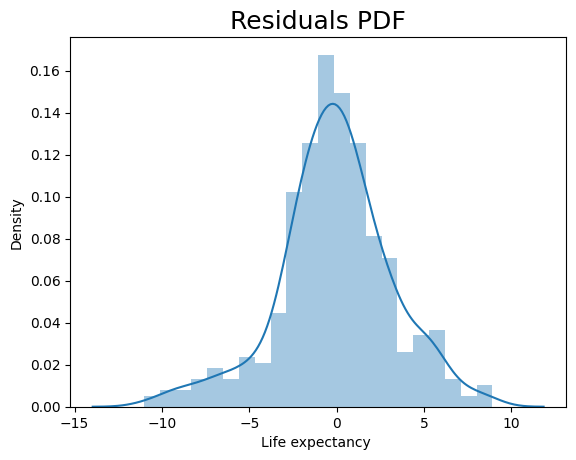

In [82]:
y_hat = Model.predict(test_x)
sns.distplot(test_y - y_hat)
plt.title("Residuals PDF", size=18)

## PLots

In [ ]:
all_countries = graph["Country"].unique()
all_countries, len(all_countries)

(array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
        'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
        'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
        'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
        'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
        'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
        'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
        'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
        'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
        'Czechia', "Democratic People's Republic of Korea",
        'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
        'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
        'Geo

In [ ]:
def country_name_clean(x):
  i1 = len(x)
  if "(" in x and ")" in x:
    i1 = x.index("(")
    i2 = x.index(")") + 1

  return x[:i1]

In [ ]:
graph["Country"] = graph.apply(lambda x: country_name_clean(x.Country).strip(), axis=1)

In [ ]:
! pip install pycountry
import pycountry

list(pycountry.countries)[0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533')

In [ ]:
dict_country = {}

In [ ]:
def ISO(country_name):
    res = pycountry.countries.get(name=country_name)
    if res:
        return (res.alpha_3)
    else:
        res = pycountry.countries.get(official_name=country_name)
        if res:
            return (res.alpha_3)
        elif country_name == "Bolivia":
            return "BOL"
        elif country_name == "Democratic Republic of the Congo":
            return "COD"
        elif country_name == "Iran":
            return "IRN"
        elif country_name == "Micronesia":
            return "FSM"
        elif country_name == "Republic of Korea":
            return "KOR"
        elif country_name == "Swaziland":
            return "SWZ"
        elif country_name == "The former Yugoslav republic of Macedonia":
            return "MKD"
        elif country_name == "Venezuela":
            return "VEN"
        else:
            print(country_name)

In [ ]:
graph["iso"] = graph.apply(lambda x: ISO(x.Country), axis=1)
graph.head()

# pycountry.countries.get(name=x.Country).alpha_2

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  iso  
0                            0.479       10.1  AFG  
1                            0.476       10.0  AFG  
2                            0.470        9.9  AFG  
3                            0.463        9.8  AFG  
4                            0.454        9.5  AFG  

[5 rows x 23 columns]

In [ ]:
for i in graph.iso.unique():
  if None == i:
    print(i)

In [ ]:
graph.iso.unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'AUS', 'AUT',
       'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA', 'BDI',
       'CIV', 'CPV', 'KHM', 'CMR', 'CAN', 'CAF', 'TCD', 'CHL', 'CHN',
       'COL', 'COM', 'COG', 'COK', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE',
       'PRK', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'ETH', 'FJI', 'FIN', 'FRA', 'GAB', 'GMB',
       'GEO', 'DEU', 'GHA', 'GRC', 'GRD', 'GTM', 'GIN', 'GNB', 'GUY',
       'HTI', 'HND', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS',
       'MEX', 'FSM', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM',
       'NRU', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'NIU', 'NOR',
       'OMN', 'PAK',

In [ ]:
graph.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
iso                                0
dtype: int64

In [ ]:
graph = graph.dropna(how = 'any', axis = 0)

In [ ]:
graph.shape

(2938, 23)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Population", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Alcohol", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Life expectancy ", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Status", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Adult Mortality", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="infant deaths", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Total expenditure", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Schooling", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color=" HIV/AIDS", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="GDP", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color=" BMI ", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
fig = px.choropleth(graph, locations="iso",
                    color="Income composition of resources", # lifeExp is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                    animation_frame="Year"
                    )
fig.show()

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context("paper")
from datetime import datetime
# import datapane as dp

#Plotly imports
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "seaborn"

In [ ]:
buttons = []
i = 0

fig3 = go.Figure()

country_list = graph.Country.unique()
country_list

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       "Côte d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Gre

In [ ]:
colmn = " BMI "

for country in country_list:
    fig3.add_trace(
        go.Scatter(
            x = graph['Year'],
            y = graph[graph["Country"] == country][colmn],
            name = country, visible = (i==0)
        )
    )

for country in country_list:
    args = [False] * len(country_list)
    args[i] = True

    #create a button object for the country we are on
    button = dict(label = country,
                  method = "update",
                  args=[{"visible": args}])

    #add the button to our list of buttons
    buttons.append(button)

    #i is an iterable used to tell our "args" list which value to set to True
    i+=1

In [ ]:
fig3.update_layout(updatemenus=[dict(active=0,
                                    type="dropdown",
                                    buttons=buttons,
                                    x = 0,
                                    y = 1.1,
                                    xanchor = 'left',
                                    yanchor = 'bottom'),
                              ])

fig3.update_layout(
    autosize=False,
    width=800,
    height=600,)

In [ ]:
col = graph.columns
numeric_col = [col[idx] for idx,i in enumerate(data.dtypes) if i==data.dtypes[1] or i==data.dtypes[-2]]
numeric_col

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population']

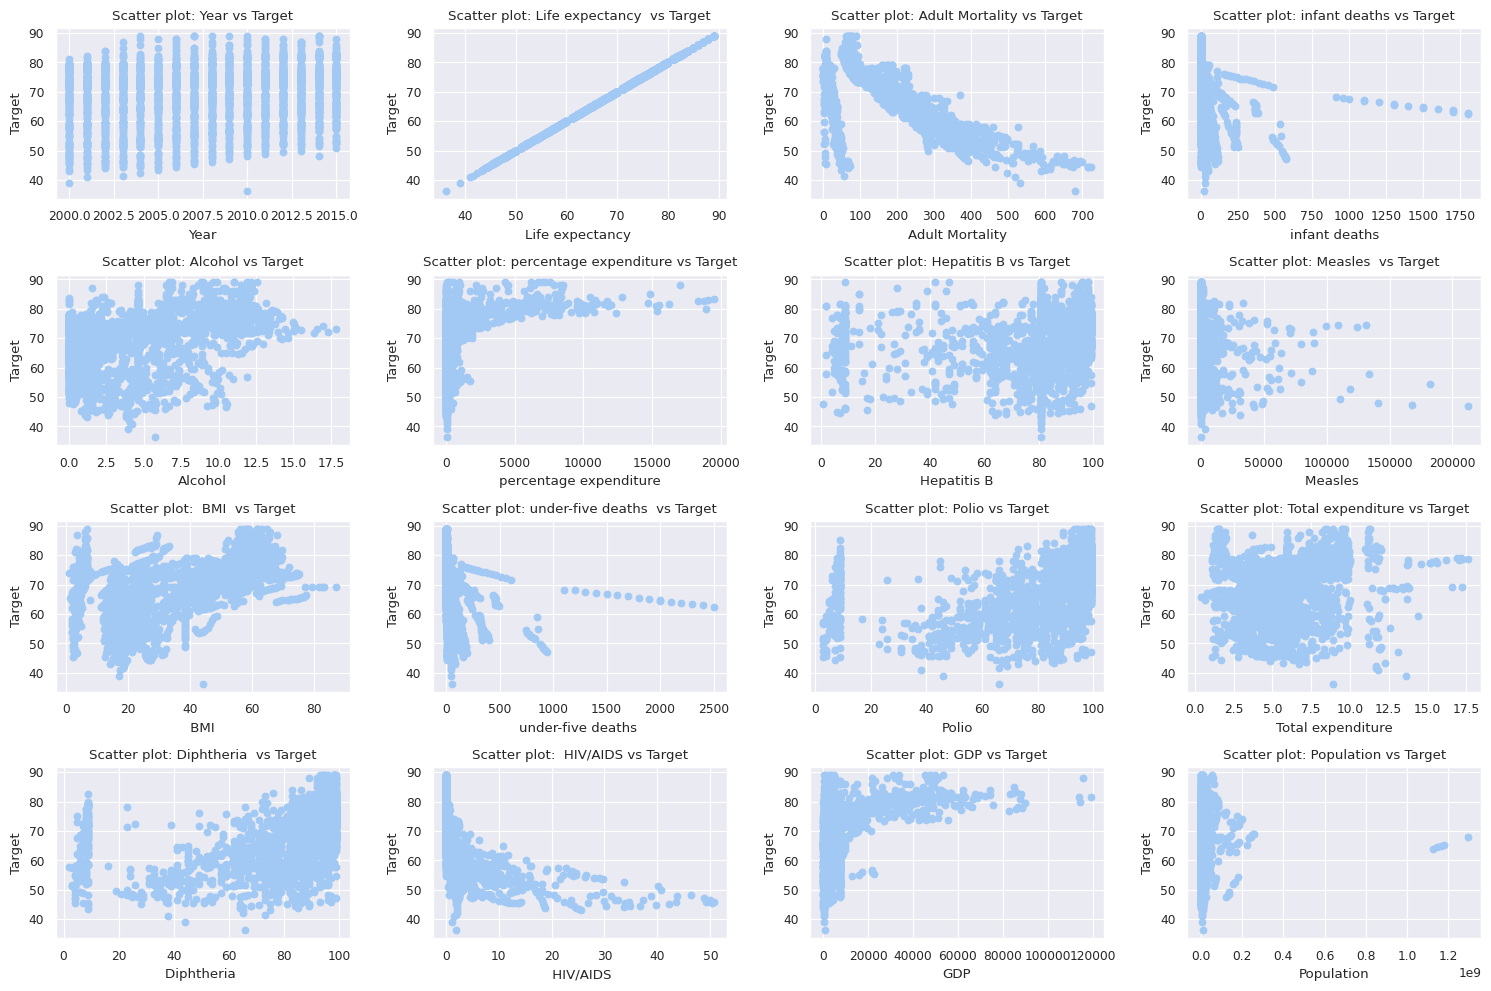

In [ ]:
# Determine the number of rows and columns for the grid
r = 4
c = 4
fig, axes = plt.subplots(r, c, figsize=(15, 10))

# Iterate over the columns and plot scatter plots
for i, column in enumerate(numeric_col):
    row = i // c  # Calculate the row index
    col = i % c  # Calculate the column index
    axes[row, col].scatter(graph[column], graph['Life expectancy '])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Target')
    axes[row, col].set_title(f'Scatter plot: {column} vs Target')

# Adjust the layout and spacing
plt.tight_layout()

# Display the plot
plt.show()